In [3]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import scipy.stats as ss
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from zipfile import ZipFile
import math

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)

In [4]:
#Load data - please don't change this part. 
df = pd.read_csv("Student Performance new.csv")
df.drop(columns={"Unnamed: 0"}, inplace=True)
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


<h1>Part 1: Is There a Significant Difference Between Boys and Girls in Math? (10 pts) </h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion. Use your judgement on what makes a good piece of evidence.

Answers Below:
<ul>
<li>MEAN - The calculation of the mean of both groups show that there's a difference (although a small one)
<li>HIST PLOT - The Histogram plot for both groups also shows that there's a difference (also small)
<li> P-VALUE - The t-test calculation, gives us a p-value that is really small (9.120185549328735e-08), indicating that the difference between the group IS SIGNIFICANT
</ul>

In [5]:
##
#Slicing out the data frame into male and female
dfF = df[df["sex"]=="F"]
dfM = df[df["sex"]=="M"]

#Slicing out the data frame of maths percentage into male and female
dfMathsF = dfF["math percentage"]
dfMathsM = dfM["math percentage"]

#Generating stats for mean and median
MeanM, StdevM, VarM,  nM = dfMathsM.mean(), dfMathsM.std(), dfMathsM.var(), dfMathsM.count()
MeanF, StdevF, VarF, nF = dfMathsF.mean(), dfMathsF.std(), dfMathsF.var(), dfMathsF.count()
print(" Male group Stats: ", MeanM, StdevM, VarM,  nM)
print(" Female group Stats: ", MeanF, StdevF, VarF,  nF)

 Male group Stats:  0.6872821576763488 0.14356277196362377 0.02061026949387944 482
 Female group Stats:  0.636332046332046 0.15491453242339517 0.023998512355959158 518


<AxesSubplot:xlabel='math percentage', ylabel='Density'>

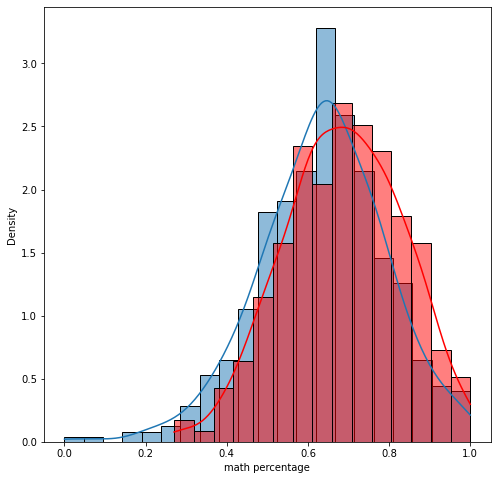

In [6]:
#plotting a histogram of the 2 groups
sns.histplot(dfMathsF, kde=True, stat="density")
sns.histplot(dfMathsM, kde=True, stat="density", color='red')

In [7]:
#using the dictionary function from spicy to calculate the Pvalue
S2, p2 = ss.ttest_ind(dfMathsM, dfMathsF)
p2

9.120185549328735e-08

<h1>Part 2: Is there a difference in math performance depending on Parental Education (15 pts)</h1>

Investigate and justify your answer. You should show 'a few' pieces of evidence to bolster your conclusion.
 

Answers Below:
<ul>
<li>LEVENE TEST - The Pvalue is high (0.45839733913132197), hence we fail to reject the null hypothesis. Our variances are most likely similar!
<li>ANOVA - The Pvalue is low (5.592272384107223e-06). Here we reject the null hypothesis as the difference is most likely significant
</ul>

In [8]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


In [9]:
#checking how many groups there are
print(df["parental level of education"].unique())

["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


<AxesSubplot:xlabel='parental level of education', ylabel='math percentage'>

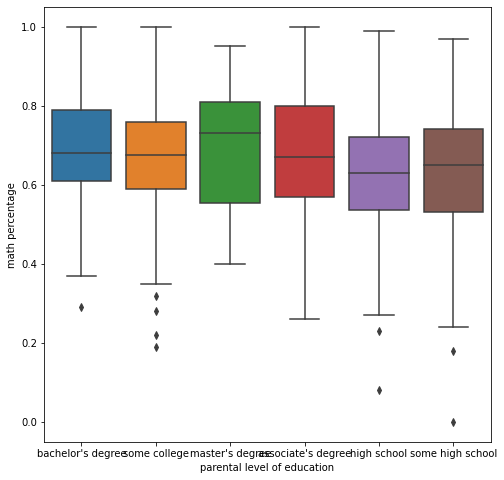

In [10]:
sns.boxplot(data=df, x="parental level of education", y="math percentage")

In [11]:
##
#slicing data frame into groups based on parental level of education
dfBD = df[df["parental level of education"]== "bachelor's degree"]
dfSC = df[df["parental level of education"]== "some college"]
dfMD = df[df["parental level of education"]== "master's degree"]
dfAD = df[df["parental level of education"]== "associate's degree"]
dfHS = df[df["parental level of education"]== "high school"]
dfSHS = df[df["parental level of education"]== "some high school"]

#Slicing out the data frame of maths percentages accordingly
dfMathsBD = dfBD["math percentage"]
dfMathsSC = dfSC["math percentage"]
dfMathsMD = dfMD["math percentage"]
dfMathsAD = dfAD["math percentage"]
dfMathsHS = dfHS["math percentage"]
dfMathsSHS = dfSHS["math percentage"]


In [12]:
#testing if the variances are equal
varStat, varP = ss.levene(dfMathsBD, dfMathsSC, dfMathsMD, dfMathsAD, dfMathsHS,dfMathsSHS)
varP

0.45839733913132197

In [13]:
#calculating the ANOVA
ss.f_oneway(dfMathsBD, dfMathsSC, dfMathsMD, dfMathsAD, dfMathsHS,dfMathsSHS)

F_onewayResult(statistic=6.521582600453217, pvalue=5.592272384107223e-06)

<h1>What appears to be the best predictor of writing performance? (10pts)</h1>

Justify your answer with about 2-3 sentences. Please also show the analysis that you did to draw your conclusion. There are multiple ways that you could come to a conclusion. 

<b>ANSWER<b>
<li>
The better predictor of writing performance is "Reading Score percentage". This is because it has got a  higher coefficient of determination (R squared = 0.9045576723188301) and also a lower (RMSE = 0.05612731762668169)

In [14]:
df.head(2)

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F


In [15]:
df.columns

Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math percentage',
       'reading score percentage', 'writing score percentage', 'sex'],
      dtype='object')

In [16]:
#slicing the data sets
wsp = "writing score percentage"
rsp = "reading score percentage"
mp = "math percentage"


In [17]:
inter, slope = thinkstats2.LeastSquares(df[wsp], df[mp])
res = thinkstats2.Residuals(df[wsp], df[mp], inter, slope)
regLine = thinkstats2.FitLine(df[wsp], inter, slope)
print("Y intercept:", inter)
print("Slope:", slope)

inter1, slope1= thinkstats2.LeastSquares(df[wsp], df[rsp])
res1 = thinkstats2.Residuals(df[wsp], df[rsp], inter, slope)
regLine1 = thinkstats2.FitLine(df[wsp], inter, slope)
print("Y intercept:", inter1)
print("Slope:", slope1)


Y intercept: 0.11583100668985502
Slope: 0.8009213173511417
Y intercept: 0.06750504735875762
Slope: 0.9171906906886338


<AxesSubplot:xlabel='writing score percentage', ylabel='math percentage'>

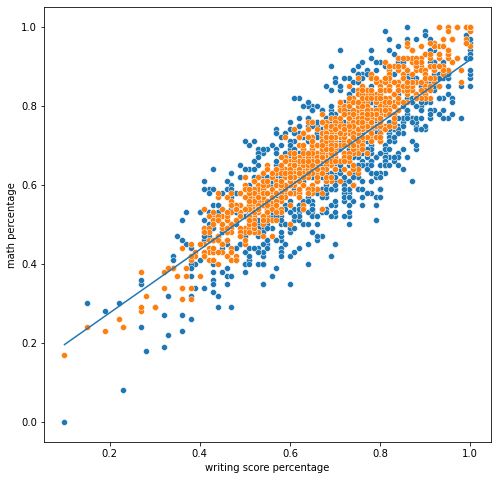

In [18]:
sns.scatterplot(x=df[wsp], y=df[mp])
sns.scatterplot(x=df[wsp], y=df[rsp])
sns.lineplot(x=regLine[0], y=regLine[1])

In [19]:
def rmseFromResiduals(residuals):
    SSE = 0
    for i in range(len(residuals)):
        SSE += (residuals[i]**2)
    MSE = SSE/len(residuals)
    return math.sqrt(MSE)

In [20]:
#Predictor of writing performance
def rSquared(yvals, residuals):
    return (1-(thinkstats2.Var(residuals)/thinkstats2.Var(yvals)))

In [24]:
print("RMSE for writing vs maths percentage is : ", rmseFromResiduals(res))
print("R2 for writing vs maths percentage is: ", rSquared(df[wsp], res))

print("RMSE for writing vs reading percentage is", rmseFromResiduals(res1))
print("R2 for writing vs reading percentage is", rSquared(df[wsp], res1))

RMSE for writing vs maths percentage is :  0.09039662966912626
R2 for writing vs maths percentage is:  0.6457580218268599
RMSE for writing vs reading percentage is 0.05612731762668169
R2 for writing vs reading percentage is 0.9045576723188301


<h1>How well can the population read? (25 pts)</h1>
<ul>
<li>The test designers tell us that a score over 55% on the reading test is a good cutoff for being functionally literate. Given that, what percentage of test takers qualify as literate? (5 pts)
<li>Assume that the test score results on this test reasonably represents the population. What is the expected mean score for the population at large, and what is the range in which you are 92% confident the population mean lies in? (15 pts)
<li>Please demonstrate your 92% confidence from above in a graphical format (5pts)
</ul>
<b> ANSWER<b>
<li>
- Approximately 82% of the population qualify as literate
<li>
- The expected mean score for the population is 0.6925
<li>
- The range in which we are 92% confident is between 0.685 and 0.699 

In [ ]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,sex
0,group B,bachelor's degree,standard,none,0.72,0.72,0.74,F
1,group C,some college,standard,completed,0.69,0.90,0.88,F
2,group B,master's degree,standard,none,0.90,0.95,0.93,F
3,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,M
4,group C,some college,standard,none,0.76,0.78,0.75,M


In [26]:
##
#Percentage of test takers that qualify as literate.
aboveCutoff = (sum(df["reading score percentage"]> 0.55) / len(df))*100
aboveCutoff


82.39999999999999

In [27]:
#function to simulate the normal distribution
def simulateNormal(mu=0, sigma=1, n=100, m=10000, ciLow=5, ciHi=95):
    means = []
    for j in range(m):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        means.append(xbar)
    cdf = thinkstats2.Cdf(means)
    ci = cdf.Percentile(ciLow), cdf.Percentile(ciHi)
    muList = [mu] * m
    stderr = mean_squared_error(means, muList, squared=False)
    return cdf, ci, stderr

Standard Error: 0.004496300130714872
Low CI: 0.685087118106346
Hi CI: 0.697974589088116


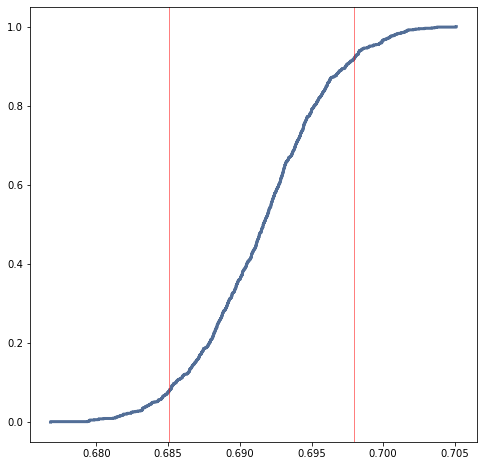

In [32]:
mu = df["reading score percentage"].mean()
sigma = df["reading score percentage"].std()
n = df["reading score percentage"].count()

cdf, ci, stderr = simulateNormal(mu=mu, sigma=sigma, n=n, m=1000, ciLow=8, ciHi=92)
print("Standard Error:", stderr)
print("Low CI:", ci[0])
print("Hi CI:", ci[1])
thinkplot.Cdf(cdf)
thinkplot.axvline(ci[0], color="red")
thinkplot.axvline(ci[1], color="red")
thinkplot.Config()

<h1>What are the odds...(10 pts)</h1>

M&M's are small candy-coated chocolates that come in a variety of colors.  
Mars, Inc., which makes M&M's, changes the mixture of colors from time to time.
In 1995, they introduced blue M&M's.  

* In 1994, the color mix in a bag of plain M&M's was 30\% Brown, 20\% Yellow, 20\% Red, 10\% Green, 10\% Orange, 10\% Tan.  

* In 1996, it was 24\% Blue , 20\% Green, 16\% Orange, 14\% Yellow, 13\% Red, 13\% Brown.

Suppose a friend of mine has two bags of M&M's, and he tells me
that one is from 1994 and one from 1996.  He won't tell me which is
which, but he gives me one M&M from each bag.  One is yellow and
one is green.  What is the probability that the yellow one came
from the 1994 bag?

Hint: The trick to this question is to define the hypotheses and the data carefully.

In [ ]:
##
#using the bayes theorem to calculate the probability
table = pd.DataFrame(index=['1994', '1996'])
table
table['prior'] = 0.5 #Prior to anything known, there's an equal chance to pick a yellow M & M from each bag
table
table["likelihood"] = 0.2, 0.14 #additional information on the likelyhood to pick a yellow M & M from either bag
table
table["unorm"] = table['prior'] * table["likelihood"]
table
probDAta = table["unorm"].sum()
table["posterior"] = table["unorm"] / probDAta
print(table)
print()
print("The probability of Yellow M&M from Bag1994 is :", 0.588235)
print()
oddYel1994 = 0.588235 / (1-0.588235)
print("The Odds is:", oddYel1994)


      prior  likelihood  unorm  posterior
1994    0.5        0.20   0.10   0.588235
1996    0.5        0.14   0.07   0.411765

The probability of Yellow M&M from Bag1994 is : 0.588235

The Odds is: 1.4285696938787897


<h1>911 Calls (10pts)</h1>
<ul>
<li>For this data, what is the mean time in between 911 calls. (Note: this will require some manipulation of data - Google "pandas date" and "date difference in minutes" as a starting point. It is not super complex, apx 2-4 lines or so) (5pts)
<li>What is a good distribution to model this? (5pts)
</ul>
<b> ANSWER<b>
- A good distribution for this is the <b>POISSON DISTRIBUTION<b>

In [ ]:
#read file - Don't change this part. 
calls = ""
with ZipFile('911_2.csv.zip') as myzip:
    with myzip.open('911_2.csv') as myfile:
       calls = pd.read_csv(myfile)
calls.head()

,zip,title,timeStamp,twp
0,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10,NEW HANOVER
1,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29,HATFIELD TOWNSHIP
2,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39,NORRISTOWN
3,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47,NORRISTOWN
4,NaN,EMS: DIZZINESS,2015-12-10 16:56,LOWER POTTSGROVE


In [ ]:
#Generate Time Between Calls
nofCalls = calls["timeStamp"].count() #total number of calls
nofCalls

663522

In [ ]:
#time between calls
timBWcalls = []
for i in range (len(calls)):
    time = (pd.to_datetime(calls["timeStap"][i])-(pd.to_datetime(calls['Planned Pickup date/time'][1])
    timBWcalls.append(time)


SyntaxError: invalid syntax (<ipython-input-71-0876e743d00f>, line 5)